# Predicting car prices

The aim of this project is to create a model based on the K nearest neighbor algorithm to predict the prices of cars based on their characteristics. The dataset usedd for this project is from https://archive.ics.uci.edu/ml/datasets/automobile

In [528]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 100

In [529]:
df = pd.read_csv('imports-85.data')
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


For some reason, this dataset does not have the column names. I am going to create a list of names and apply it to the dataset to make it a bit more tidy.

In [530]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [531]:
df.columns = cols

In [532]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [533]:
df.replace('?', np.nan, inplace = True) # Replace missing values (?) with np.nan

In [534]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Certain columns are object type due to missing values. Let's convert them to float.

In [535]:
float_cols = ['normalized-losses',  'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[float_cols] = df[float_cols].astype(float)

In [536]:
df['normalized-losses'].isnull().count()

204

Before cleanning the data anymore, I am going to select the columns that have continuous values. These columns are the columns required to predict the prices.

In [537]:
df.price.isnull().sum()

4

In [538]:
df_continuous = df[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].copy()
df_continuous

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [539]:
df_continuous.isnull().sum() #Null values per column

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We still have some missing values, the most of them in 'normalized-losses'. I am going to replace them with the column means.

In [540]:
df_continuous.fillna(df_continuous.mean(), inplace= True) # Replace null values with the mean for their column
df_continuous.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Let's now normalize df_continuous to make it ready to apply K nearest neighbors. It is important to not normalize 'price' column.

In [541]:
prices = df_continuous.price #Create a series from Columnn prices before normalizing the dataframe

In [542]:
prices

0      16500.0
1      16500.0
2      13950.0
3      17450.0
4      15250.0
        ...   
199    16845.0
200    19045.0
201    21485.0
202    22470.0
203    22625.0
Name: price, Length: 204, dtype: float64

In [543]:
#Normalize the dataframe and replace the column prices with the values from the series prices
df_continuous = (df_continuous - df_continuous.mean())/ df_continuous.std()
df_continuous.price = prices
df_continuous

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.702724,-0.426707,-0.846254,-2.040916,-0.014566,0.074449,0.519477,-1.855010,-0.288404,0.171083,-0.263538,-0.647209,-0.546452,16500.0
1,0.000000,-0.718430,-0.232565,-0.194095,-0.556319,0.512293,0.601464,-2.392100,0.679069,-0.288404,1.256570,-0.263538,-0.952482,-0.691414,16500.0
2,1.322462,0.165766,0.204253,0.131985,0.227218,-0.418811,-0.428610,-0.512474,0.454530,-0.037211,-0.056111,0.782331,-0.189299,-0.111564,13950.0
3,1.322462,0.099035,0.204253,0.225150,0.227218,0.514209,0.218180,-0.512474,0.454530,-0.539597,0.272059,0.782331,-1.105118,-1.271264,17450.0
4,0.000000,0.165766,0.260878,0.178567,-0.267648,-0.093116,0.218180,-0.512474,0.454530,-0.414001,0.145840,0.782331,-0.952482,-0.836377,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-0.850154,1.717281,1.191138,1.389719,0.722083,0.759438,0.337956,1.661995,-0.347393,-0.162808,0.246815,0.573157,-0.341936,-0.401489,16845.0
200,-0.850154,1.717281,1.191138,1.343137,0.722083,0.945276,0.337956,1.661995,-0.347393,-0.363762,1.408033,0.363983,-0.952482,-0.836377,19045.0
201,-0.850154,1.717281,1.191138,1.389719,0.722083,0.874389,1.104523,0.924886,-1.245548,-0.338643,0.751692,0.782331,-1.105118,-1.126302,21485.0
202,-0.850154,1.717281,1.191138,1.389719,0.722083,1.267139,0.433777,-1.175872,0.454530,3.228300,0.044864,-0.681886,0.115974,-0.546452,22470.0


The dataset is ready to train and test some models. Let's try to find the column that better predicts the price 

In [544]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create a fuction that takes three arguments: a column used to train, a column that we want to predict and the dataframe we want to use. 
# The function randomizes the dataframe and divides it in two sets, one for training and one for testing. It returns the root mean squared error of the model 

def knn_train_set(train_col, target_col, dframe):
    np.random.seed(1)
    dframe = dframe.loc[np.random.permutation(len(dframe))]
    train = dframe.iloc[:round(len(dframe)*0.8),:]
    test = dframe.iloc[round(len(dframe)**0.8):,:] # Divide the dataframe in test and train. Train is 80% of the dataframe and test is 20%
    knn = KNeighborsRegressor()
    knn.fit(train[train_col], train[target_col])
    prediction = knn.predict(test[train_col])
    rmse = mean_squared_error(test[target_col], prediction)** (1/2)
    return rmse
    

In [545]:
#Find the which column gives the lowest root mean squared error 
rmses = {}
check_cols = df_continuous.columns.tolist()
check_cols.remove('price')
for col in check_cols:
    rmses[col] =knn_train_set([col], 'price', df_continuous)
    
rmses
    

{'normalized-losses': 8899.458403598243,
 'wheel-base': 4816.1990323021855,
 'length': 3920.26100662477,
 'width': 4240.097166390971,
 'height': 6661.821680387123,
 'curb-weight': 3659.5026619041205,
 'engine-size': 3331.36737421824,
 'bore': 5997.813836713306,
 'stroke': 5611.788388730831,
 'compression-rate': 5900.196478279977,
 'horsepower': 3995.008171034522,
 'peak-rpm': 6972.696788252274,
 'city-mpg': 4523.549501130909,
 'highway-mpg': 3882.801909278336}

In [546]:
min(rmses.values())

3331.36737421824

In [547]:
min(rmses, key = rmses.get)

'engine-size'

In [548]:
# Test again all columns but in this case for each column, we will test different K numbers
def knn_train_set_Ks(train_col, target_col, dframe, k):
    np.random.seed(1)
    dframe = dframe.loc[np.random.permutation(len(dframe))]
    train = dframe.iloc[:round(len(dframe)*0.8),:]
    test = dframe.iloc[round(len(dframe)**0.8):,:] # Divide the dataframe in test and train. Train is 80% of the dataframe and test is 20%
    
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(train[train_col], train[target_col])
    prediction = knn.predict(test[train_col])
    rmses = mean_squared_error(test[target_col], prediction)** (1/2)
    return rmses

In [549]:
rmses = {}
check_cols = df_continuous.columns.tolist()
check_cols.remove('price')
ks = [1,3,5,7,9]
for col in check_cols:
    n_neighbors = {}
    for k in ks:
        n_neighbors[k] = knn_train_set_Ks([col], 'price', df_continuous, k)
    rmses[col] = n_neighbors
    
rmses

{'normalized-losses': {1: 6451.775072781399,
  3: 10047.563285526609,
  5: 8899.458403598243,
  7: 7481.717642633802,
  9: 7284.248082488232},
 'wheel-base': {1: 5146.454849981466,
  3: 3972.453880017729,
  5: 4816.1990323021855,
  7: 5188.37685106057,
  9: 5254.716993540167},
 'length': {1: 4028.353467802258,
  3: 3590.590780751014,
  5: 3920.26100662477,
  7: 4564.146946413513,
  9: 5175.824244547218},
 'width': {1: 5148.110948476454,
  3: 4258.522819703165,
  5: 4240.097166390971,
  7: 4590.068621368934,
  9: 4596.515364841319},
 'height': {1: 7871.50184223841,
  3: 7029.007579701778,
  5: 6661.821680387123,
  7: 6841.939252728394,
  9: 6923.603775286858},
 'curb-weight': {1: 3637.9610521044756,
  3: 3612.5676417980058,
  5: 3659.5026619041205,
  7: 3747.880670307932,
  9: 3799.2946702357362},
 'engine-size': {1: 4036.0738867882706,
  3: 3289.129880760731,
  5: 3331.36737421824,
  7: 3425.390611648825,
  9: 3572.319083729331},
 'bore': {1: 7184.826681593618,
  3: 5981.41633234898,
 

In [550]:
#Convert rmses dictionary into DataFrame
rmses_frame = pd.DataFrame(rmses) #Convert 'rmses' to DataFrame
rmses_frame

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,6451.775073,5146.454850,4028.353468,5148.110948,7871.501842,3637.961052,4036.073887,7184.826682,6055.127677,5831.428911,3843.306722,11776.597288,7531.037815,5012.230568
3,10047.563286,3972.453880,3590.590781,4258.522820,7029.007580,3612.567642,3289.129881,5981.416332,5386.870603,5550.888515,3928.427698,6700.031542,4547.024443,4432.845709
5,8899.458404,4816.199032,3920.261007,4240.097166,6661.821680,3659.502662,3331.367374,5997.813837,5611.788389,5900.196478,3995.008171,6972.696788,4523.549501,3882.801909
7,7481.717643,5188.376851,4564.146946,4590.068621,6841.939253,3747.880670,3425.390612,6225.569212,6346.764764,6088.926118,4314.606783,6754.838915,4498.431331,3926.586494
9,7284.248082,5254.716994,5175.824245,4596.515365,6923.603775,3799.294670,3572.319084,6373.498629,6410.212241,6009.861350,4385.585524,6914.219626,4454.368361,4075.639488


In [551]:
rmses_frame.min().idxmin()

'engine-size'

The best results for an univariate model are achieved using 'engine-size' as column and 4 as number of neighbors


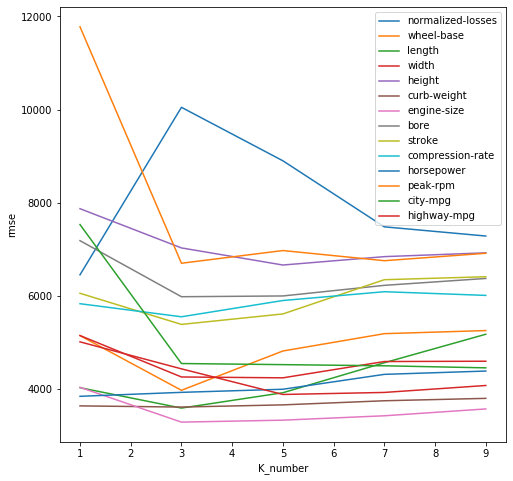

In [552]:
# Create a plot to compare how the K number affects the RMSE of each column 
plt.figure(figsize= (8,8))
for key, value in rmses.items():
   
    x = list(value.keys())
    y = list(value.values())
    
    
    plt.plot(x,y, label = '{}'.format(key))
    

    plt.xlabel('K_number')
    plt.ylabel('rmse')
    
    plt.legend()

The previous plot shows how the predictions change for each column when we change K.

# Multivariate prediction Models

Let's modify the previous code to use more than one column to make our predictions.

In [553]:
# Modify the previous function to take multiple columns 
def knn_multivar(train_cols, target_col, dframe, k):
    np.random.seed(1)
    dframe = dframe.loc[np.random.permutation(len(dframe))]
    train = dframe.iloc[:round(len(dframe)*0.8),:]
    test = dframe.iloc[round(len(dframe)**0.8):,:] # Divide the dataframe in test and train. Train is 80% of the dataframe and test is 20%
    
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(train[train_cols], train[target_col])
    prediction = knn.predict(test[train_cols])
    rmses = mean_squared_error(test[target_col], prediction)** (1/2)
    return rmses

In [554]:
#RMSE result using all the columns and K equal to 5
knn_multivar(check_cols, 'price',df_continuous, 5)

3385.786211237687

In [555]:
#Check how rmse change depending on the number of features
#From the previous analysis calculate the mean rmse for each feature to get a ranking of the best features:
mean_rmse = {}
for key, value in rmses.items():
    mean_rmse[key] = sum(value.values())/len(value.values())
mean_rmse

{'normalized-losses': 8032.952497405657,
 'wheel-base': 4875.640321380424,
 'length': 4255.835289227754,
 'width': 4566.662984156168,
 'height': 7065.574826068512,
 'curb-weight': 3691.441339270054,
 'engine-size': 3530.8561674290795,
 'bore': 6352.6249383751765,
 'stroke': 5962.152734719706,
 'compression-rate': 5876.260274489314,
 'horsepower': 4093.386979640396,
 'peak-rpm': 7823.676831988787,
 'city-mpg': 5110.882290280174,
 'highway-mpg': 4266.020833781315}

In [556]:
# Convert mean_rmse to Series and sort it in ascending order.
mean_rmse = pd.Series(mean_rmse)
mean_rmse = mean_rmse.sort_values(ascending = True)
mean_rmse

engine-size          3530.856167
curb-weight          3691.441339
horsepower           4093.386980
length               4255.835289
highway-mpg          4266.020834
width                4566.662984
wheel-base           4875.640321
city-mpg             5110.882290
compression-rate     5876.260274
stroke               5962.152735
bore                 6352.624938
height               7065.574826
peak-rpm             7823.676832
normalized-losses    8032.952497
dtype: float64

In [557]:
# Check how many of the best columns give the best result for a standar K value of 5
best_features = {}
features_list = [2,3,4,5]
for i in features_list:
    best_features['Best {} features'.format(i)] = knn_multivar(mean_rmse.index[:i], 'price', df_continuous, 5)

best_features
    

{'Best 2 features': 3117.743039621991,
 'Best 3 features': 3136.339865951102,
 'Best 4 features': 2868.0380212150435,
 'Best 5 features': 2775.754791792821}

It seems that the best results are achieved with five features for a standard K of 5. Let's check now if we can improve it even more changing K and maintaining 5 features.

In [558]:
# Create models using 2, 3, 4 or 5 of the best features and K ranging from 1 to 25
best_features_k = {}
k_list = range(1,26)
for i in features_list:
    value_key = {}
    for k in k_list:
        value_key[k] = knn_multivar(mean_rmse.index[:i], 'price', df_continuous, k)
    best_features_k['Best {} features'.format(i)] = value_key

best_features_k
        

{'Best 2 features': {1: 3050.092779024755,
  2: 2773.6889792582333,
  3: 3020.816643423251,
  4: 3018.816957996674,
  5: 3117.743039621991,
  6: 3143.5887577166213,
  7: 3143.5862252708735,
  8: 3202.778129271936,
  9: 3251.612850207357,
  10: 3311.5061781238733,
  11: 3373.3823412615375,
  12: 3396.377316059845,
  13: 3537.9144215836964,
  14: 3591.0506549755996,
  15: 3641.4693093322626,
  16: 3769.7298208093675,
  17: 3824.513127345819,
  18: 3843.9513092003017,
  19: 3826.7577730569747,
  20: 3842.916970676547,
  21: 3910.4763674698975,
  22: 3961.0123983325266,
  23: 3997.275620409536,
  24: 4044.054919893649,
  25: 4107.638218799033},
 'Best 3 features': {1: 1701.114482815319,
  2: 2365.5418103300935,
  3: 2638.467365381715,
  4: 2920.616679589023,
  5: 3136.339865951102,
  6: 3311.568441673832,
  7: 3320.2012761272686,
  8: 3350.864126049308,
  9: 3379.0852005546258,
  10: 3465.58353983414,
  11: 3442.5804746872805,
  12: 3518.5403647025173,
  13: 3564.5089893933623,
  14: 3588.

In [563]:
#Convert bestbest_features_k to DataFrame
best_features_k_frame = pd.DataFrame(best_features_k )
best_features_k_frame

,Best 2 features,Best 3 features,Best 4 features,Best 5 features
1,3050.092779,1701.114483,1571.490803,2388.740012
2,2773.688979,2365.541810,2274.420942,2510.110580
3,3020.816643,2638.467365,2538.015582,2640.400676
4,3018.816958,2920.616680,2692.914698,2617.893654
5,3117.743040,3136.339866,2868.038021,2775.754792
6,3143.588758,3311.568442,3177.152176,3065.550419
7,3143.586225,3320.201276,3359.203945,3183.433872
8,3202.778129,3350.864126,3467.252013,3339.009157
9,3251.612850,3379.085201,3578.191147,3423.526557
10,3311.506178,3465.583540,3557.784417,3552.095327


In [560]:
#Check what K number generates the lowest RMSE for each group of features

best_features_k_frame.idxmin()

Best 2 features    2
Best 3 features    1
Best 4 features    1
Best 5 features    1
dtype: int64

In [561]:
#Min RMSE for each group of features

best_features_k_frame.min()

Best 2 features    2773.688979
Best 3 features    1701.114483
Best 4 features    1571.490803
Best 5 features    2388.740012
dtype: float64

The best result is achieved with the best four features and K equal to one. 

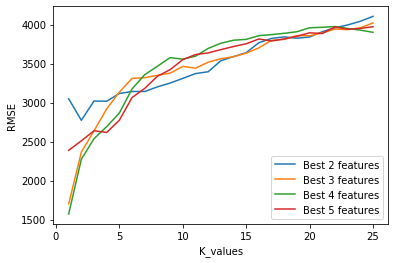

In [562]:
#Plot showing how the K number affects the RMSE of each group of features.
for key, value in best_features_k.items():
    x = list(values.keys())
    y = list(value.values())
    
    plt.plot(x,y, label = key)
    plt.xlabel('K_values')
    plt.ylabel('RMSE')
    plt.legend()
    

It is clear that the best results are achieved using columns 'engine-size', 'curb-weight', 'horsepower' and 'length'and K equal to 1. Let's check how far the prices predicted are from the actual prices on the test set

In [570]:
np.random.seed(1)
dframe = df_continuous.loc[np.random.permutation(len(df_continuous))]
train = dframe.iloc[:round(len(dframe)*0.8),:]
test = dframe.iloc[round(len(dframe)**0.8):,:] # Divide the dataframe in test and train. Train is 80% of the dataframe and test is 20%
 
knn = KNeighborsRegressor(n_neighbors= k)
knn.fit(train[['engine-size', 'curb-weight', 'horsepower']], train['price'])
prediction = knn.predict(test[['engine-size', 'curb-weight', 'horsepower']])

result = pd.DataFrame({'prediction': prediction, 'Actual': test['price']})

#Create a column to calculate the percentage difference between the price predicted and the actual price
result['percent'] = abs((result['prediction'] - result['Actual'])/result['Actual'] * 100)
result

,prediction,Actual,percent
5,15268.48,17710.0,13.786110
162,7336.88,8058.0,8.949119
105,19959.64,18399.0,8.482200
48,26530.88,36000.0,26.303111
164,10444.68,9298.0,12.332545
...,...,...,...
133,12880.84,15040.0,14.356117
137,7103.88,5118.0,38.801876
72,26853.36,40960.0,34.440039
140,8275.84,7126.0,16.135841


In [574]:
# mean percentage difference
estimate = 100 - result.percent.mean()
estimate

82.60461655681416